In [2]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import pandas as pd

%matplotlib inline


In [12]:
# Load the ./data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-1800s_converted.csv file
#C:\HOME\Work\asteptess\asteptesss-4409\data\tess-stitched\allesfitter_converted_2458\4409-tess-lightcurves-180s.csv
lc1800 = pd.read_csv('c:/HOME/Work/asteptess/asteptesss-4409/data/tess-stitched/raw/4409-tess-lightcurves-1800s.csv')
# Load also 1800 and 600s
lc180 = pd.read_csv('c:/HOME/Work/asteptess/asteptesss-4409/data/tess-stitched/raw/4409-tess-lightcurves-180s.csv')
lc600 = pd.read_csv('c:/HOME/Work/asteptess/asteptesss-4409/data/tess-stitched/raw/4409-tess-lightcurves-600s.csv')

# Concatenate them
lc = pd.concat([lc1800, lc180, lc600])


# Load it in lightkurve
lc = lk.LightCurve(time=lc['#time'], flux=lc['flux'], flux_err=lc['flux_err'])

<Axes: xlabel='Time [JD]', ylabel='Flux'>

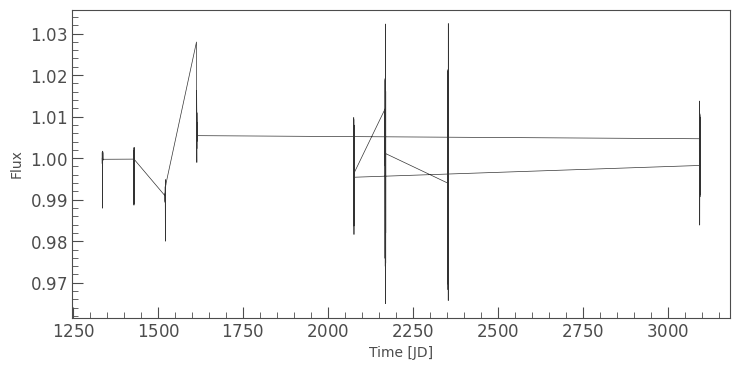

In [13]:
lc.plot()

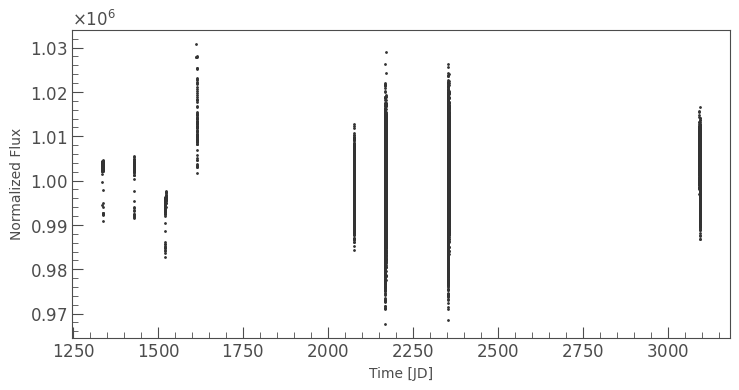

: 

In [14]:
lc_processed = lc.normalize(unit='ppm').remove_nans().remove_outliers()
lc_processed.scatter();

<Axes: xlabel='Time [JD]', ylabel='Normalized Flux'>

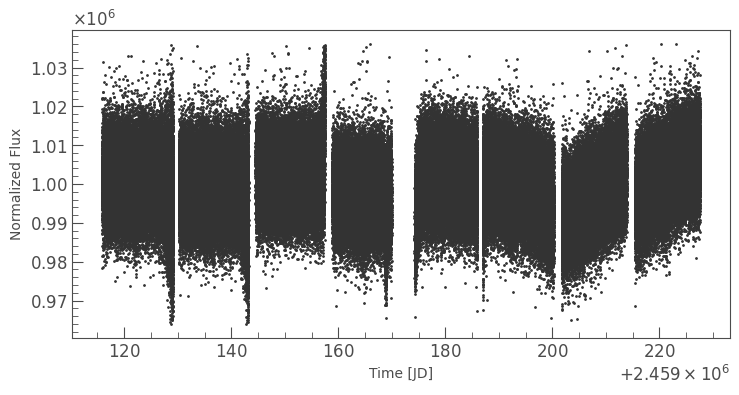

In [7]:
#To the time column, add 2457000.0
lc_processed.time = lc_processed.time + 2457000.0

# Plot the light curve
lc_processed.scatter()



In [8]:
# Print the first time entry and the last
print(lc_processed.time[0], lc_processed.time[-1])

2459115.885577817 2459169.9464389686


In [13]:
# Open toi4409-full-tess-stitched-nonans-filtered1day-sorted.csv as a df
# df = pd.read_csv('toi4409-full-tess-stitched-nonans-filtered1day-sorted.csv')
df = filtered_df
# Sort by time
df = df.sort_values(by='time')

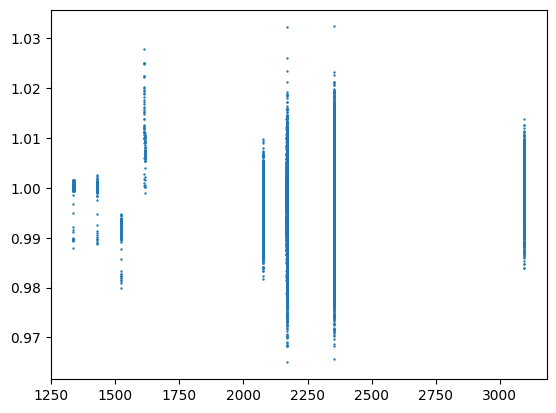

In [14]:
# Plot the results
plt.scatter(df['time'], df['flux'], s=0.5)

<Axes: xlabel='Time [JD]', ylabel='Flux'>

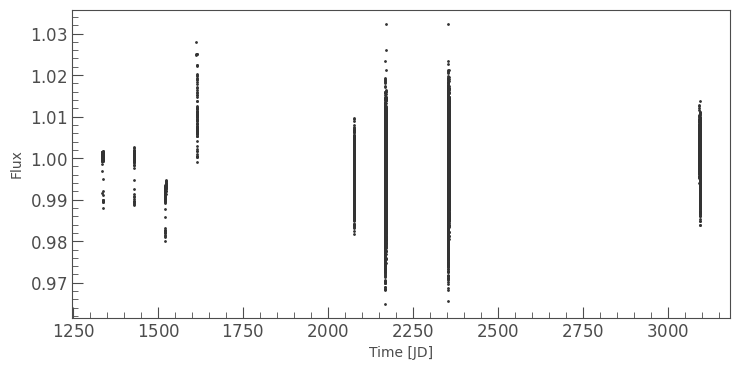

In [19]:
# Load the df as a lightcurve
paperprep_lcs = lk.LightCurve(df['time'].values, df['flux'].values, df['flux_err'].values)

# Plot the lightcurve
paperprep_lcs.scatter()

In [21]:
# import lightkurve as lk
# import numpy as np

def plot_transit_windows(lightcurve, t0, period, times, x):
    """
    Plots the lightcurve data around specific transit windows.
    
    Parameters:
    - lightcurve: Lightkurve's LightCurve object.
    - t0: Transit midpoint.
    - period: Orbital period.
    - times: List of integer multipliers for the period.
    - x: Number of days around each transit to display.
    """
    
    # Create a figure
    plt.figure(figsize=(14, 8))
    
    # For each multiplier in times, plot the data around the transit window
    for time_multiplier in times:
        transit_time = t0 + period * time_multiplier
        mask = (lightcurve.time.jd > transit_time - x) & (lightcurve.time.jd < transit_time + x)
        
        # Plot the data within the mask
        plt.errorbar(lightcurve.time[mask].value, lightcurve.flux[mask], yerr=lightcurve.flux_err[mask], fmt='.k', ecolor='gray', elinewidth=0.5, capsize=2, label=f"Multiplier: {time_multiplier}")

    plt.xlabel('Time (days)')
    plt.ylabel('Flux')
    plt.legend()
    plt.title(f"Lightcurve Data around Transit Windows")
    plt.tight_layout()
    plt.show()

# The function definition is provided, and the sample usage is commented out for reference.
# Uncommenting the below lines will demonstrate the function, but we need a sample lightcurve and parameters for it to work.

# Sample usage:
# paperprep_lcs = lk.LightCurve(data['# time'].values, data['flux'].values, data['flux_err'].values)
# plot_transit_windows(paperprep_lcs, t0=2, period=1, times=[1, 2, 3], x=0.5)


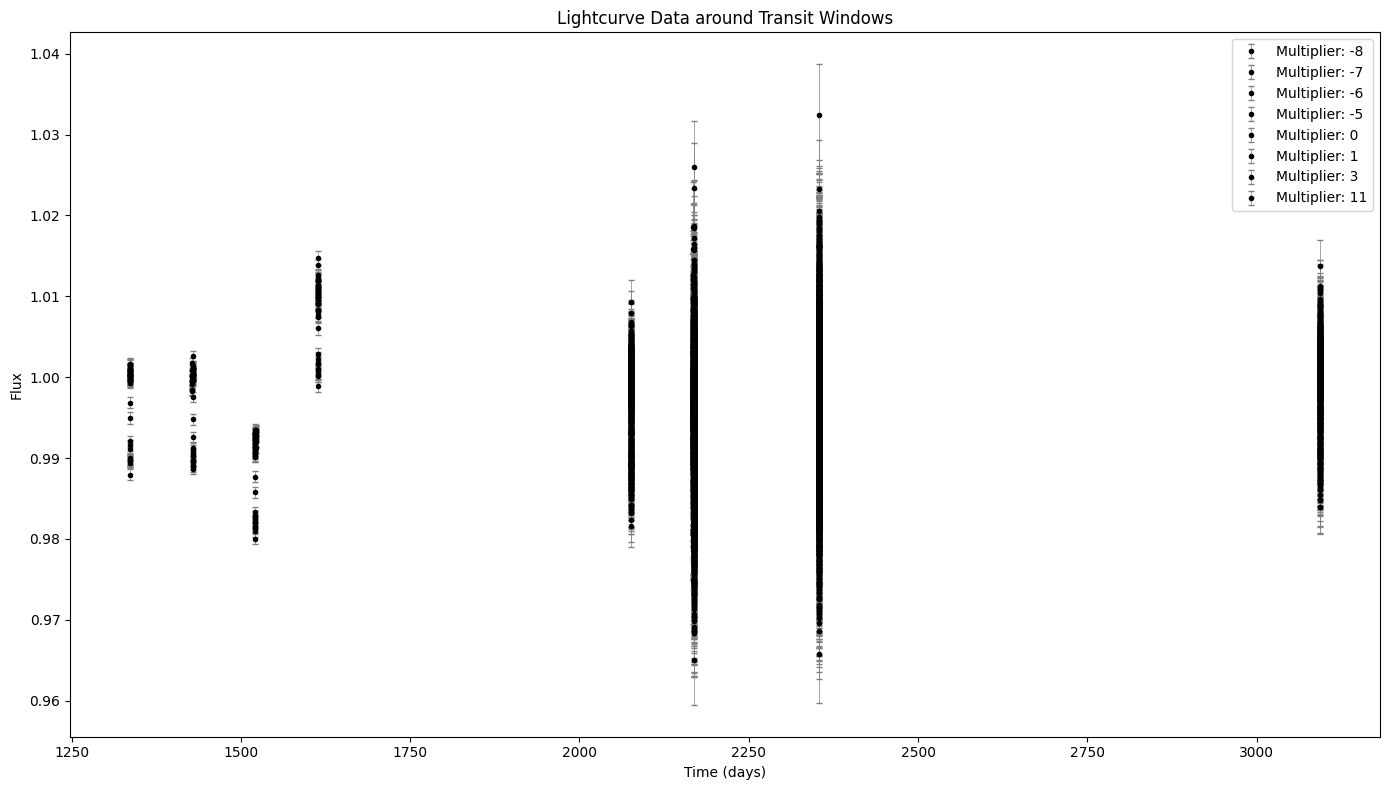

In [22]:
plot_transit_windows(paperprep_lcs, t0=2076.346853, period=92.492, times=[-8, -7, -6, -5, 0, 1, 3, 11], x=0.5)

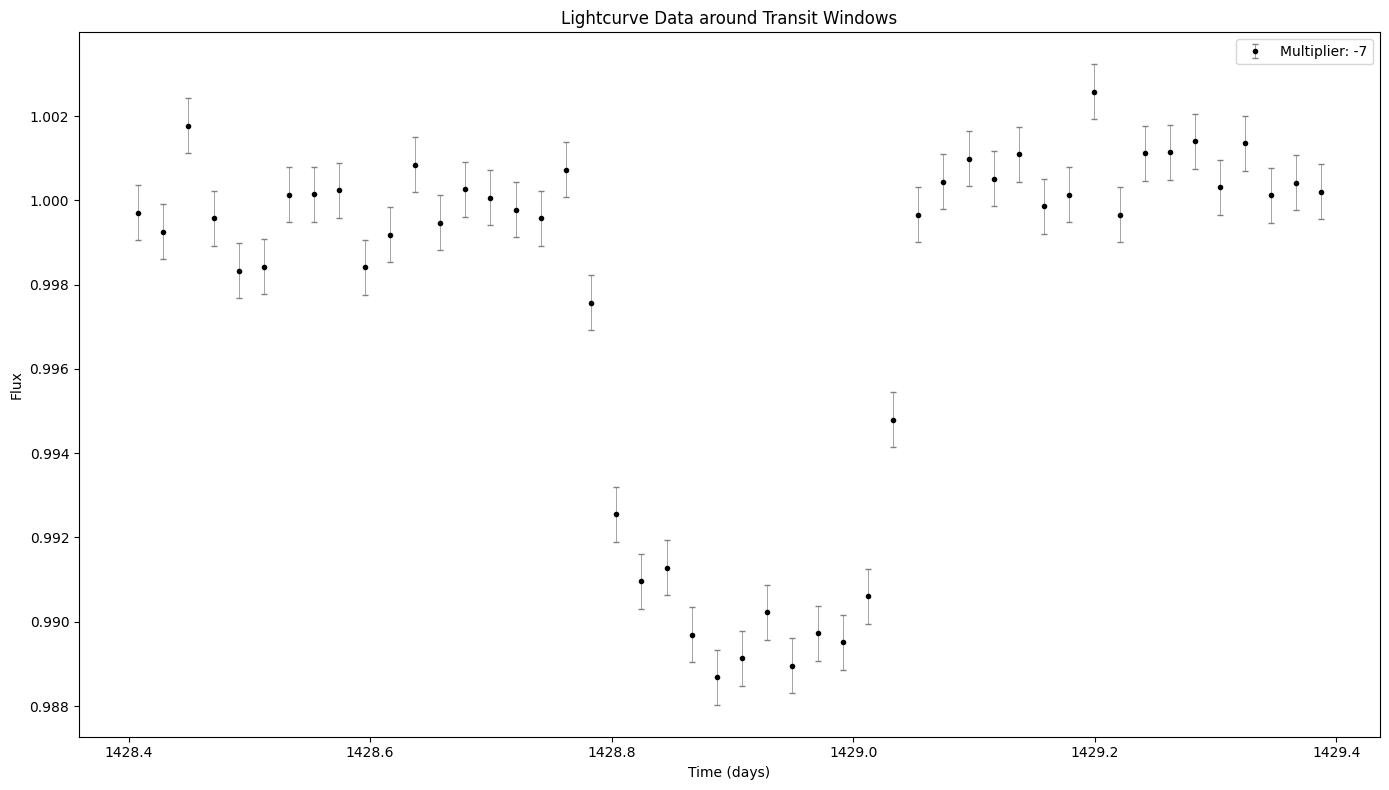

In [23]:
plot_transit_windows(paperprep_lcs, t0=2076.346853, period=92.492, times=[-7], x=0.5)

In [24]:
def plot_specific_transit_windows(lightcurve, t0, period, x, start_multiplier, end_multiplier):
    """
    Plots the lightcurve data around specific transit windows that have at least one data point inside the specified range.
    
    Parameters:
    - lightcurve: Lightkurve's LightCurve object.
    - t0: Transit midpoint.
    - period: Orbital period.
    - x: Number of days around each transit to display.
    - start_multiplier: Start of the range of multipliers for the period.
    - end_multiplier: End of the range of multipliers for the period.
    """
    
    # Convert the lightcurve time to Julian Date for comparison
    lc_time_jd = lightcurve.time.jd
    
    # For each multiplier in the specified range
    for time_multiplier in range(start_multiplier, end_multiplier + 1):
        transit_time = t0 + period * time_multiplier
        mask = (lc_time_jd > transit_time - x) & (lc_time_jd < transit_time + x)
        
        # Check if there's at least one data point inside the window
        if np.any(mask):
            # Plot the data within the mask in a separate figure
            plt.figure(figsize=(10, 6))
            plt.errorbar(lc_time_jd[mask], lightcurve.flux[mask], yerr=lightcurve.flux_err[mask], fmt='.k', ecolor='gray', elinewidth=0.5, capsize=2, label=f"Multiplier: {time_multiplier}")
            plt.xlabel('Time (JD)')
            plt.ylabel('Flux')
            plt.legend()
            plt.title(f"Lightcurve Data around Transit Window (Multiplier: {time_multiplier})")
            plt.tight_layout()
            plt.show()

# The function definition is provided.
# You can use this function in your environment with the 'lightkurve' library.


In [38]:
import pandas as pd

def save_transit_window(lightcurve, t0, period, x, start_multiplier, end_multiplier, directory='', delimiter="csv"):
    """
    Saves each transit window to a file, format and delimiter based on arguments.

    Parameters:
    - lightcurve: Lightcurve data.
    - t0: Transit midpoint.
    - period: Orbital period.
    - x: Number of days around each transit to display.
    - start_multiplier: Start of the range of multipliers for the period.
    - end_multiplier: End of the range of multipliers for the period.
    - directory: Directory where the files will be saved.
    - delimiter: Delimiter for the file, supports "csv", "space", and "tab".
    """
    # Ensure the directory string ends with a slash if not empty
    if directory and not directory.endswith('/'):
        directory += '/'

    # Determine file extension and delimiter based on the input
    if delimiter == "space":
        file_extension = ""
        sep = " "
    elif delimiter == "tab":
        file_extension = ""
        sep = "\t"
    else:  # Default to CSV
        file_extension = ".csv"
        sep = ","

    count = 0
    # For each multiplier in the specified range
    for time_multiplier in range(start_multiplier, end_multiplier + 1):
        transit_time = t0 + period * time_multiplier
        # Calculate mask based on the lightcurve time data
        mask = (lightcurve.time.jd > transit_time - x) & (lightcurve.time.jd < transit_time + x)
        
        # Check if there's at least one data point inside the window
        if mask.any():
            # Extract time, flux, and flux_err (and possibly other relevant data) using the mask
            time_data = lightcurve.time.jd[mask]
            flux_data = lightcurve.flux[mask]
            flux_err_data = lightcurve.flux_err[mask]
            
            # Create a DataFrame with the necessary columns
            df = pd.DataFrame({
                'time': time_data,
                'flux': flux_data,
                'flux_err': flux_err_data,
            })
            
            # Construct file path
            file_path = f"{directory}tess_lc_{count}{file_extension}"
            # Save the DataFrame to file with specified delimiter
            df.to_csv(file_path, sep=sep, index=False)
            count += 1



            
# save_transit_window_to_csv(paperprep_lcs, t0=2076.346853, period=92.492, x=2, start_multiplier=-8, end_multiplier=11, directory='./transit_windows/')
# save_transit_window(paperprep_lcs, t0=2076.346853, period=92.492, x=2, start_multiplier=-8, end_multiplier=11, directory='./transit_windows/space/tess/', delimiter="space")


In [44]:
# To each time in paperprep_lcs, add 2457000.0, if the numbers are below 10000
paperprep_lcs.time = paperprep_lcs.time + 2457000.0 if paperprep_lcs.time[0].value < 10000 else paperprep_lcs.time

save_transit_window(paperprep_lcs, t0=2076.346853 + 2457000.0, period=92.492, x=2, start_multiplier=-8, end_multiplier=11, directory='./transit_windows/space/tess/', delimiter="space")


In [43]:
print( paperprep_lcs.time[0])

2458335.427156298


In [32]:
# print paperprep_lcs containing columns time, flux, and flux_err
print(paperprep_lcs['time'])

[1335.4271563  1335.44798999 1335.46882369 ... 3094.75481102 3094.7561999
 3094.75758879]


In [30]:
# Load all the CSV files in the directory and plot them
import os

# Get all the CSV files in the directory
directory = './transit_windows/'
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
csv_files.sort()

# Plot the data from each CSV file
for file in csv_files:
    # Load the CSV file as a DataFrame
    df = pd.read_csv(directory + file)
    
    # Create a LightCurve object from the DataFrame
    lc = lk.LightCurve(df['time'].values, df['flux'].values, df['flux_err'].values)
    
    # Plot the LightCurve
    lc.scatter()
    plt.title(file)
    plt.show()

KeyError: 'time'

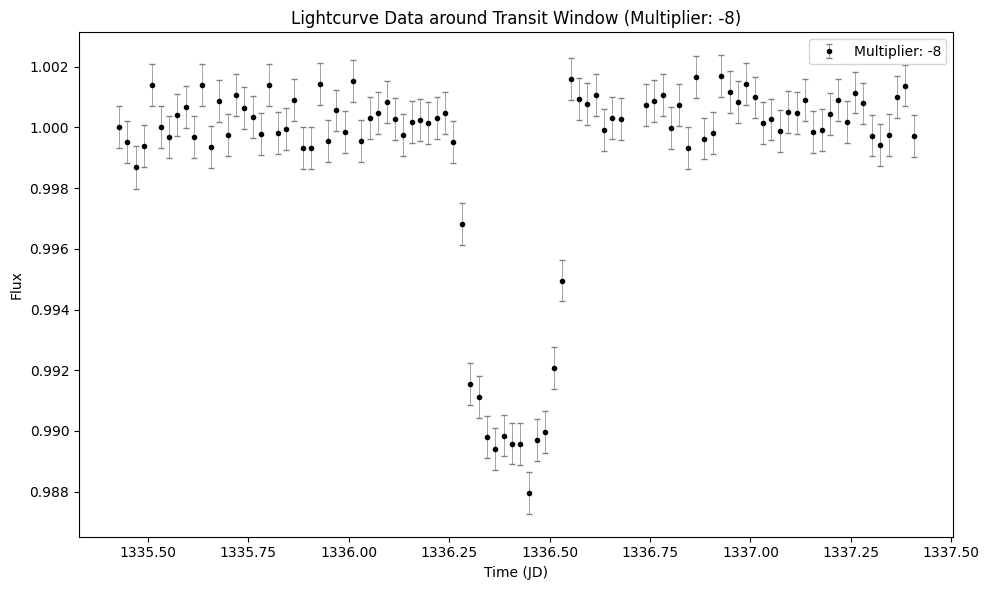

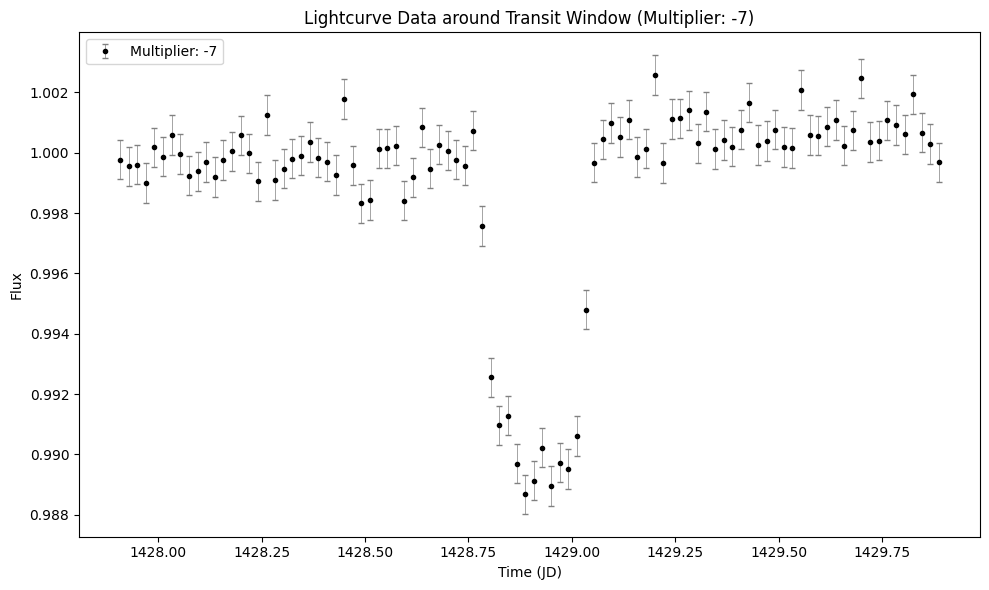

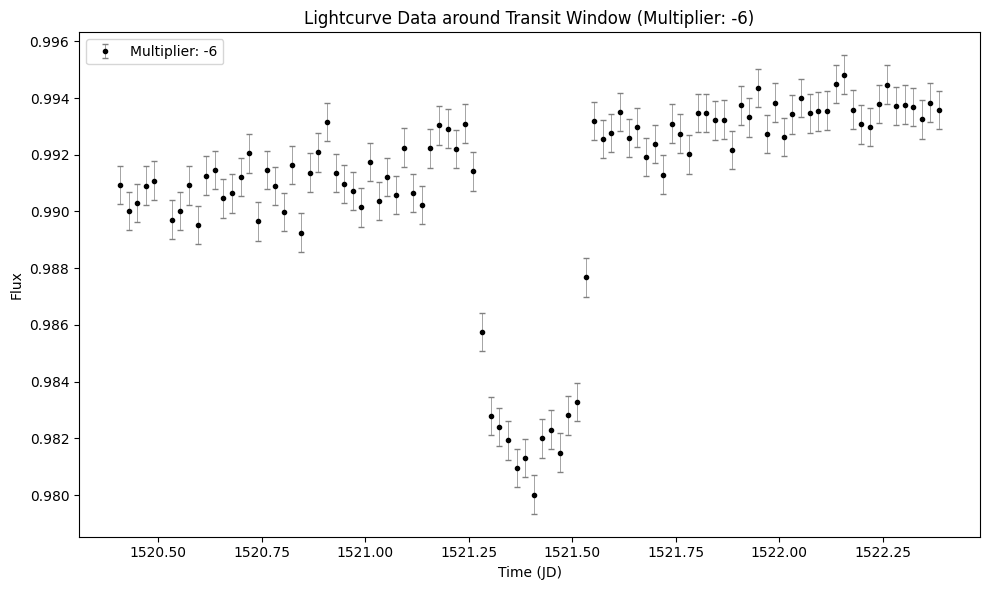

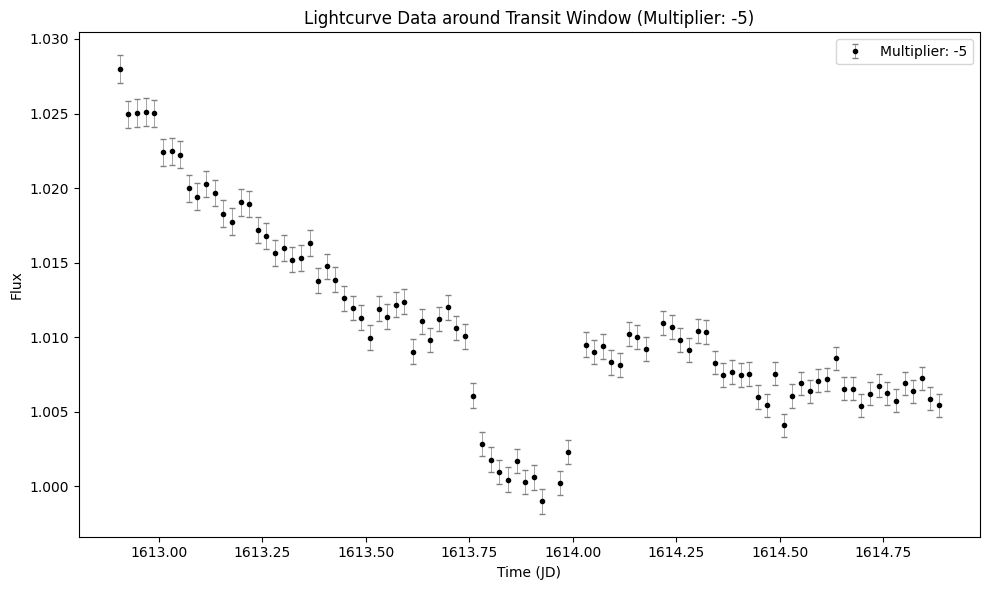

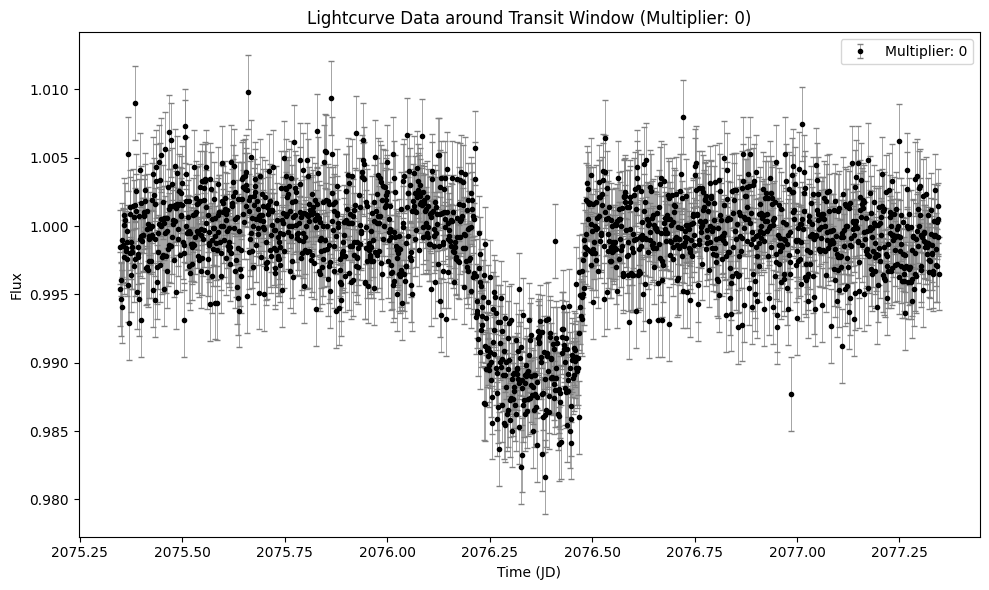

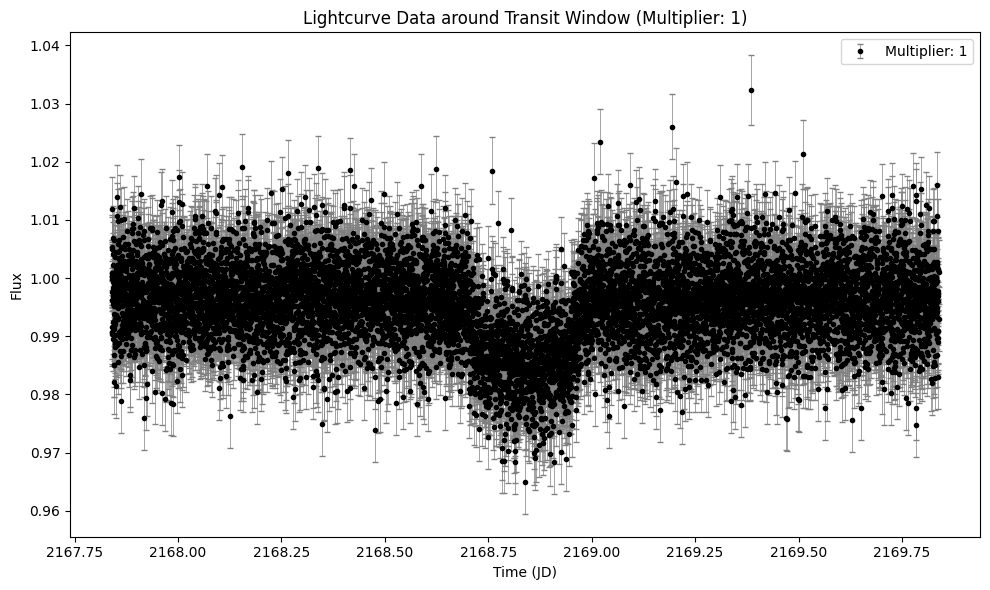

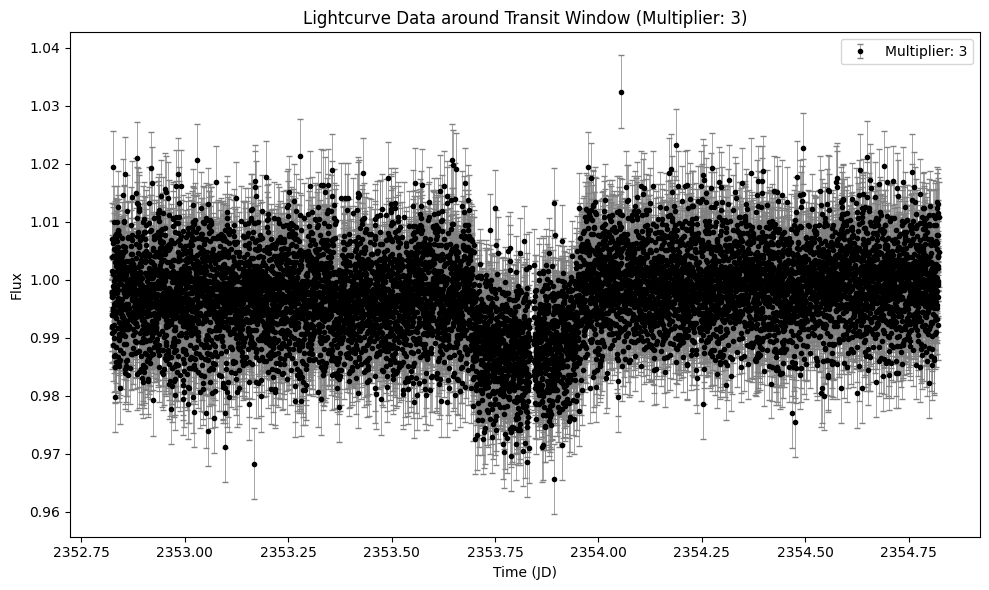

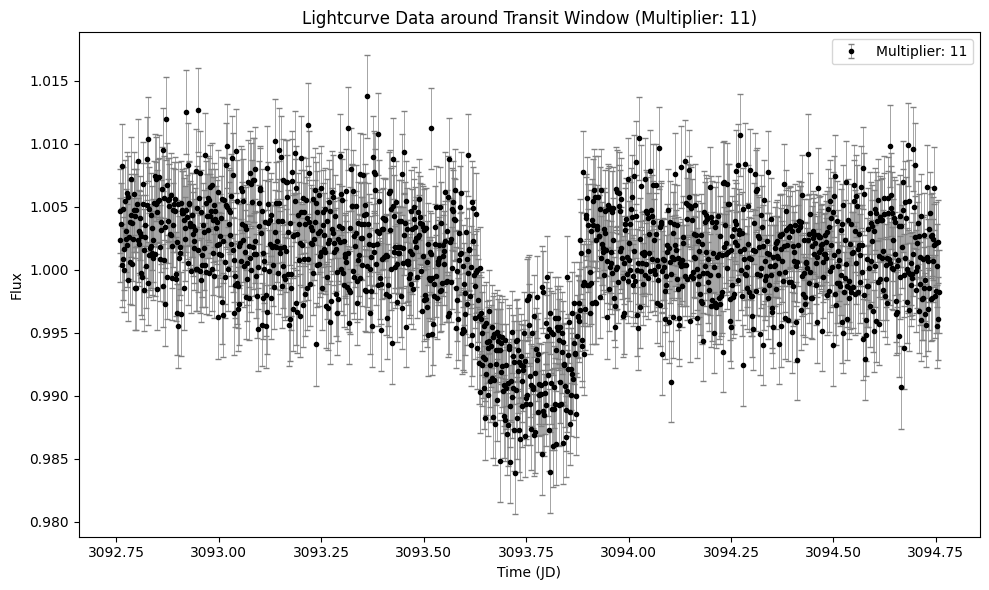

In [27]:
plot_specific_transit_windows(paperprep_lcs, t0=2076.346853, period=92.492, x=2, start_multiplier=-8, end_multiplier=11)

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def fixed_final_plot_transit_windows_grid(lightcurve, t0, period, x, start_multiplier, end_multiplier, 
                                          n_columns, x_label, y_label, y_scale=1, 
                                          subplot_title="", main_title="", save_path=None, offset_jd=0):
    """
    Plots the lightcurve data around specific transit windows in a grid layout.
    
    Parameters:
    - lightcurve: Lightkurve's LightCurve object.
    - t0: Transit midpoint.
    - period: Orbital period.
    - x: Number of days around each transit to display.
    - start_multiplier: Start of the range of multipliers for the period.
    - end_multiplier: End of the range of multipliers for the period.
    - n_columns: Number of columns for the grid layout.
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    - y_scale: Scaling factor for the y-axis (default is 1).
    - subplot_title: Title for each subplot (default is empty).
    - main_title: Title for the main plot.
    - offset_jd: Offset to be applied to the x-axis labels (default is 0).
    """
    
    # Convert the lightcurve time to Julian Date for comparison
    lc_time_jd = lightcurve.time.jd
    
    # Collect valid multipliers
    valid_multipliers = []
    
    for time_multiplier in range(start_multiplier, end_multiplier + 1):
        transit_time = t0 + period * time_multiplier
        mask = (lc_time_jd > transit_time - x) & (lc_time_jd < transit_time + x)
        
        # Check if there's at least one data point inside the window
        if np.any(mask):
            valid_multipliers.append(time_multiplier)
    
    # Calculate the number of rows for the grid layout
    n_rows = int(np.ceil(len(valid_multipliers) / n_columns))
    
    # Create the grid plot
    fig, axs = plt.subplots(n_rows, n_columns, figsize=(4*n_columns, 4*n_rows))
    
    # Handle the case for single row
    if n_rows == 1:
        axs = np.expand_dims(axs, axis=0)
    
    for i, ax in enumerate(axs.ravel()):
        if i < len(valid_multipliers):
            time_multiplier = valid_multipliers[i]
            transit_time = t0 + period * time_multiplier
            mask = (lc_time_jd > transit_time - x) & (lc_time_jd < transit_time + x)
            
            ax.errorbar(lc_time_jd[mask], lightcurve.flux[mask] / y_scale, yerr=lightcurve.flux_err[mask] / y_scale, fmt='.k', ecolor='gray', elinewidth=0.5, capsize=2)
            ax.set_title(subplot_title)

            # Adjust x-axis labels by the offset
            ax.set_xlabel(x_label)
            new_xticks = ax.get_xticks() + offset_jd
            ax.set_xticklabels(new_xticks)

            ax.set_ylabel(y_label)
        else:
            ax.axis('off')  # Turn off any additional subplots
    
    # Adjusting suptitle positioning
    plt.suptitle(main_title, y=1.05)
    plt.tight_layout()
    
    # If save path is provided, save the figure
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        
    plt.show()


In [73]:
# Given paperprep_lcs, sum -1000 to each time.jd value
# paperprep_lcs.time.jd = paperprep_lcs.time.jd + 1000

C:\Users\patri\AppData\Local\Temp\ipykernel_44984\2280870471.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticks)


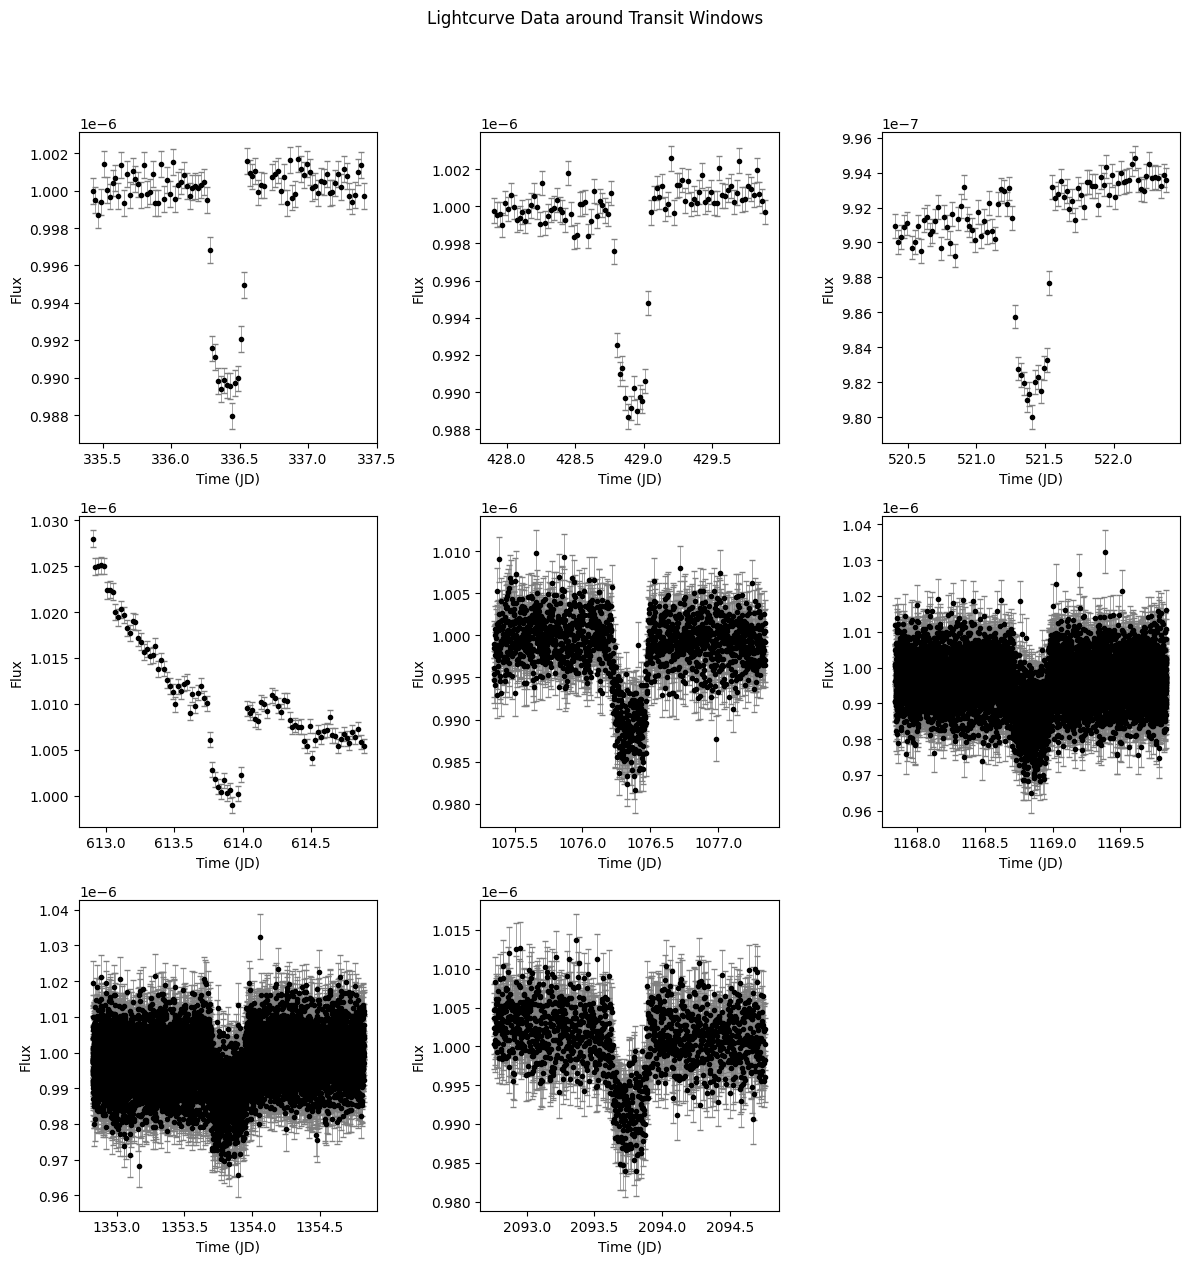

In [79]:
fixed_final_plot_transit_windows_grid(paperprep_lcs, t0=2076.346853, period=92.492, x=1, start_multiplier=-8, end_multiplier=11, n_columns=3, x_label="Time (JD)", y_label="Flux", subplot_title="", y_scale=10e5,  main_title="Lightcurve Data around Transit Windows", save_path="toi4409-transit-windows_offset.png", offset_jd = -1000.0) 

C:\Users\patri\AppData\Local\Temp\ipykernel_44984\2280870471.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_xticks)


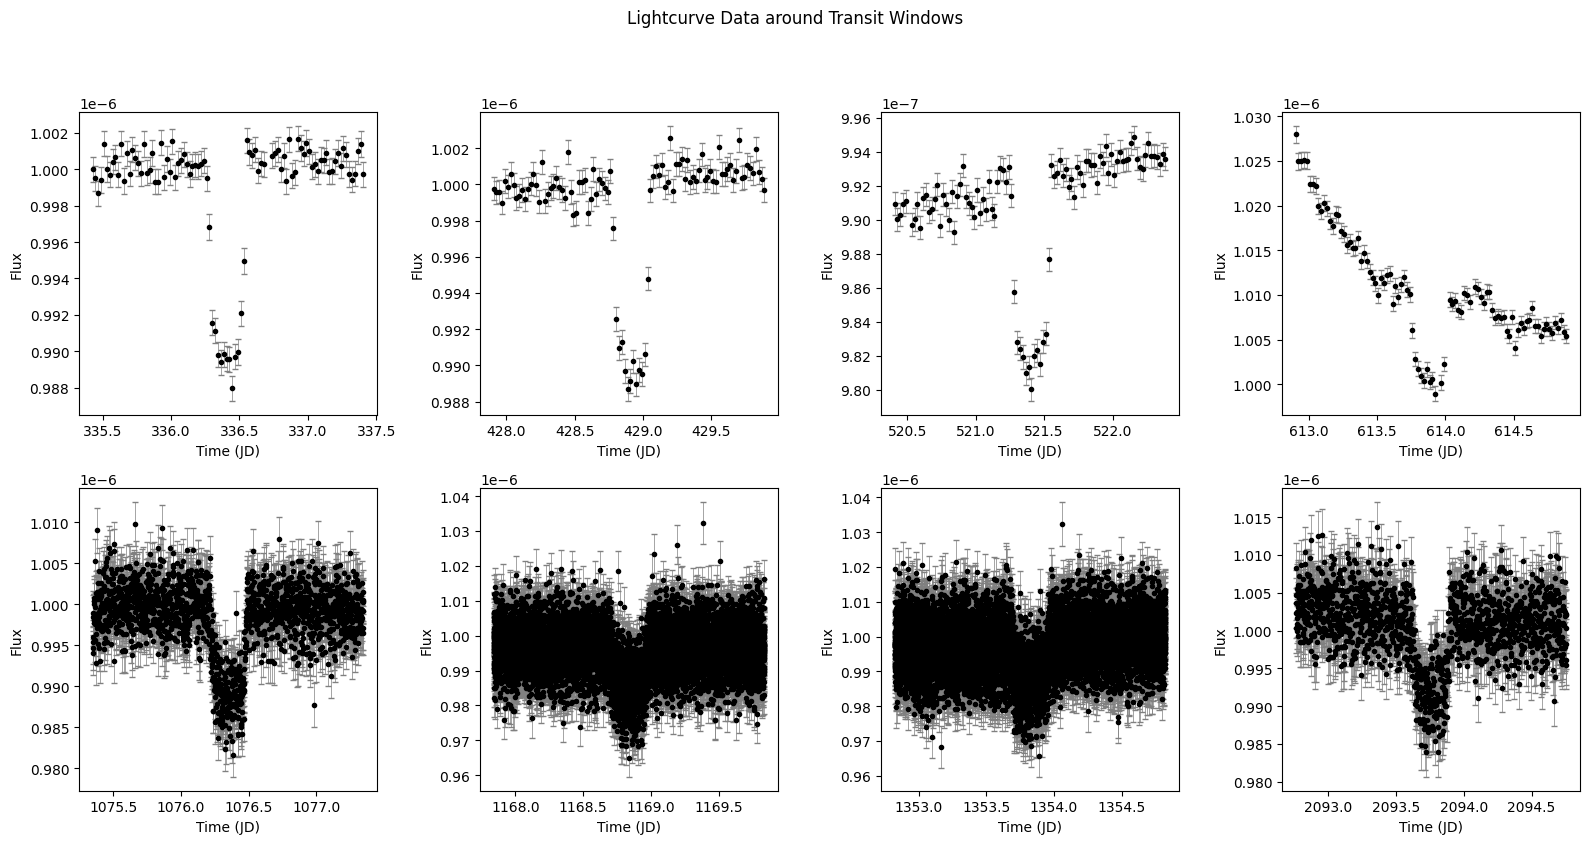

In [82]:
fixed_final_plot_transit_windows_grid(paperprep_lcs, t0=2076.346853, period=92.492, x=1, start_multiplier=-8, end_multiplier=11, n_columns=4, x_label="Time (JD)", y_label="Flux", subplot_title="", y_scale=10e5,  main_title="Lightcurve Data around Transit Windows", save_path="toi4409-transit-windows_offset.png", offset_jd = -1000.0) 

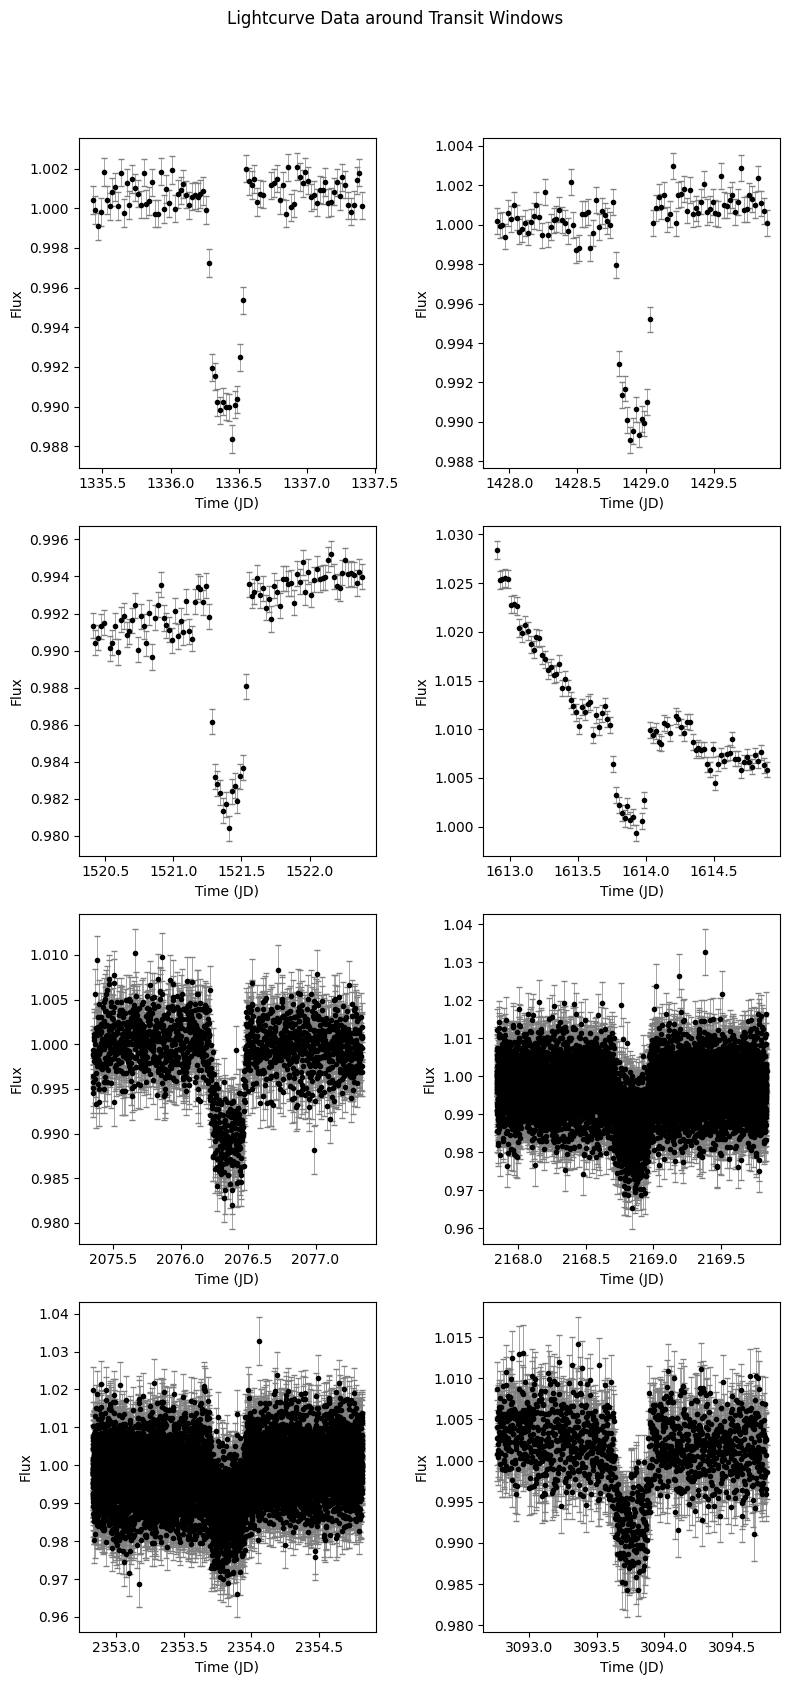

In [ ]:
fixed_final_plot_transit_windows_grid(paperprep_lcs, t0=2076.346853, period=92.492, x=1, start_multiplier=-8, end_multiplier=11, n_columns=2, x_label="Time (JD)", y_label="Flux", subplot_title="", y_scale=10e5,  main_title="Lightcurve Data around Transit Windows", save_path="toi4409-transit-windows-2cols.png") 

In [ ]:
# Save the plot
plt.savefig('toi4409-transit-windows.jpeg')

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Phase [JD]', ylabel='Flux'>

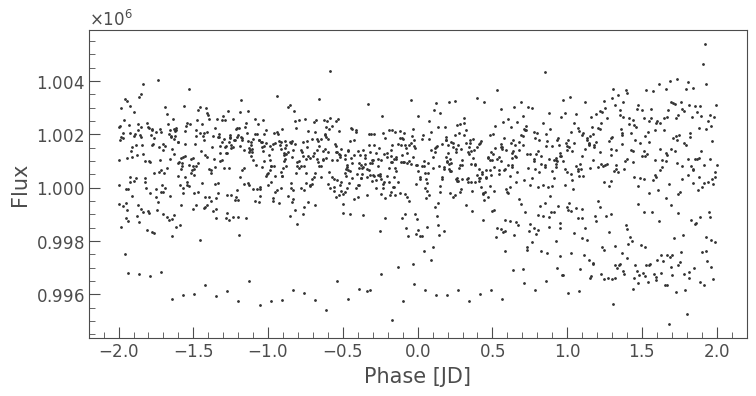

In [ ]:
# Fold this new LightCurve on the period and epoch of the transit
lc_folded_2 = lc.fold(period=92.492, epoch_time=2459076.346853)
# Cut 1 day before and after the transit
lc_folded_2 = lc_folded_2[(lc_folded_2.time < 2) & (lc_folded_2.time > -2)]
lc_folded_2.scatter()

In [ ]:
# Print the amount of data points in lc_processed
print(len(lc_processed)) # 1325547 / 25k = 53.xxx = 53

# From lc_processed, make all points an average, so that the data size has a total of 25000 points
lc_processed_binned = lc_processed.bin(binsize=53)
lc_processed_binned.plot();


1325547


/tmp/ipykernel_20238/3870013359.py:5: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc_processed_binned = lc_processed.bin(binsize=53)


ValueError: shape mismatch: value array of shape (27413,) could not be broadcast to indexing result of shape (18448,)

In [ ]:
lc_processed_binned

NameError: name 'lc_processed_binned' is not defined

In [ ]:
# Save the binned data as a CSV file
lc_processed_binned.to_csv('toi4409-tess-stitched-binned25k.csv')


In [ ]:
# Shift the X axis so that the 2076.346853 value is at 0, without folding, by substacting the value from the time column
# lc_processed_shifted = 

# Plot the shifted data
# lc_processed_shifted.scatter()

AttributeError: object has no attribute shift

In [ ]:
folded = lc_processed.fold(period=92.492, t0=(2459076.346853-2457000)*u.day)

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

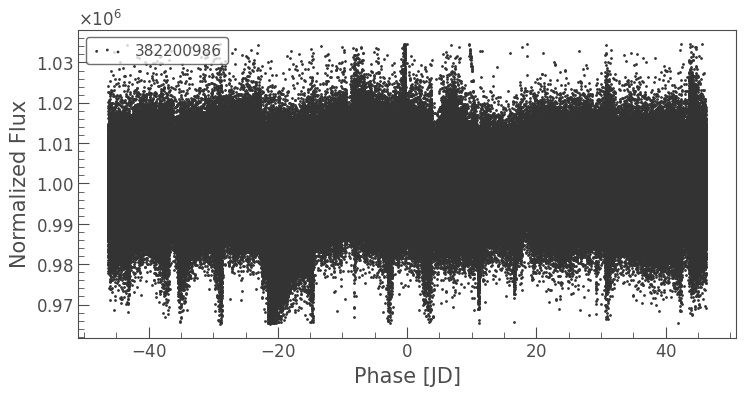

In [ ]:
folded.scatter()

In [ ]:
folded2 = lc_processed.fold(period=92.492, t0=(2459076.346853-2457000)*u.day)

/home/codespace/.python/current/lib/python3.10/site-packages/astropy/utils/decorators.py:604: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

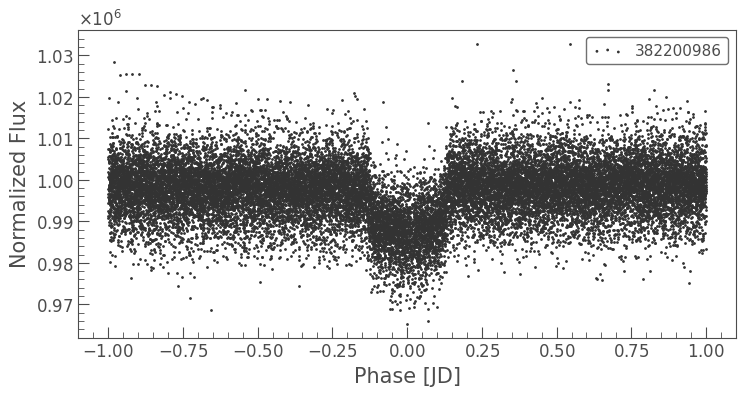

In [ ]:
# Cut data from phase -1 to 1
folded_11 = folded2[(folded2.phase > -1) & (folded2.phase < 1)]
folded_11.scatter()

In [ ]:
# Export the data as a CSV file
folded_11.to_csv('toi4409-tess-folded.csv')

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

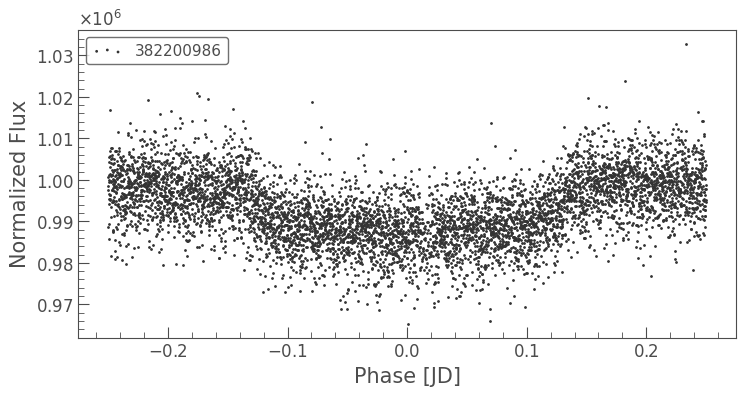

In [ ]:
# Cut the phase from -0.25 to 0.25
folded_025 = folded2[(folded2.phase > -0.25) & (folded2.phase < 0.25)]
folded_025.scatter()


In [ ]:
# Export the data as a CSV file
folded_025.to_csv('toi4409-tess-folded-025.csv')


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

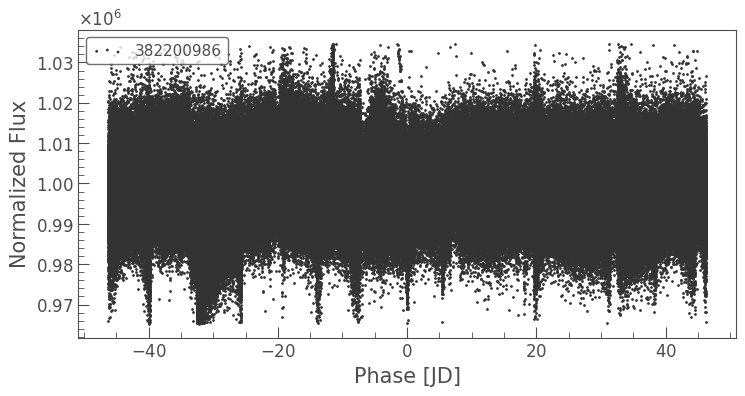

In [ ]:
folded2.scatter()